# Lab 4
The goal of this practical is to investigate the logistic regression model. This is broken down into four parts:
- [Part A](#Part-A:-Investigating-line-search): investigating line search as a method for optimising black box functions
- [Part B](PartB.ipynb): applying Newton's method and steepest descent as optimisation methods for two-dimensional functions
- [Part C](PartC.ipynb): using the same optimisation methods for fitting a logistic regression model to simple 2D data
- [Part D](PartD.ipynb): implementing the logistic regression model for face detection by using a binary classifier on image data

# Part A: Investigating line search
Look through the code to understand the goal of this part, and then fill in the 'TO DO' sections - starting with implementing the ['`line_search`'](#Optimisation-procedure) method 

### Import modules

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('machinevision.mplstyle')
from numpy import arange, array, exp, sin
from scipy.optimize import fmin

# Define functions to optimise
You can think of each of these functions as being a 'black box'

In [2]:
def my_function(x):
    if x < 0:
        return -x
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2)


def my_function2(x):
    if x < 0:
        return -x - exp(-0.5 * (-0.2 / 0.025)**2)
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2) - exp(-0.5 * ((x - 0.2) / 0.025)**2)

# Optimisation procedure

In [3]:
def line_search(function, start, end, tolerance):
    a = start
    d = end

    while (d - a) > tolerance:
        print('Current Search Region is {:6.6f} to {:6.6f}'.format(a, d))
        
        # TO DO - Implement a line search iteration:
        #
        # step 1: Remove the break above
        # step 2: Calculate intermediate positions b and c, 1/3 and 2/3 of the way through interval
        #         (between a and d), respectively
        b = a + (d-a)/3
        c = a + 2*(d-a)/3
        #
        # step 3:  Evaluate function at points b and c
        #
        # step 4:  Update point a or d depending on the values of those evaluations
        if(function(b)<function(c)):
            d=c
        else:
            a=b

    return a, function(a)

# Construct data

In [4]:
function = my_function

x = arange(0, 1, step=0.01)
w = array([function(x_i) for x_i in x])

# Perform optimisation

### Line search

In [5]:
min_x, min_value = line_search(function, start=0, end=1, tolerance=1e-4)

Current Search Region is 0.000000 to 1.000000
Current Search Region is 0.333333 to 1.000000
Current Search Region is 0.555556 to 1.000000
Current Search Region is 0.555556 to 0.851852
Current Search Region is 0.555556 to 0.753086
Current Search Region is 0.621399 to 0.753086
Current Search Region is 0.665295 to 0.753086
Current Search Region is 0.665295 to 0.723823
Current Search Region is 0.684804 to 0.723823
Current Search Region is 0.684804 to 0.710816
Current Search Region is 0.684804 to 0.702146
Current Search Region is 0.690585 to 0.702146
Current Search Region is 0.690585 to 0.698292
Current Search Region is 0.693154 to 0.698292
Current Search Region is 0.694867 to 0.698292
Current Search Region is 0.694867 to 0.697150
Current Search Region is 0.695628 to 0.697150
Current Search Region is 0.695628 to 0.696643
Current Search Region is 0.695966 to 0.696643
Current Search Region is 0.695966 to 0.696417
Current Search Region is 0.696116 to 0.696417
Current Search Region is 0.696217 

### SciPy optimisation
There is a SciPy method that can do this optimisation for you given a function.

**TO DO:** Look up the help page for the function `fmin`, you can also try `?fmin` in a new jupyter cell to get an information about functions.

In [6]:
scipy_min_x = fmin(function, x0=0, xtol=1e-4)
scipy_min_value = function(scipy_min_x)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 24
         Function evaluations: 48


# Visualise results
If everything is working correctly the optimised `x` from the line search and the result from `fmin` should coincide, and appear to be at the function's minimum

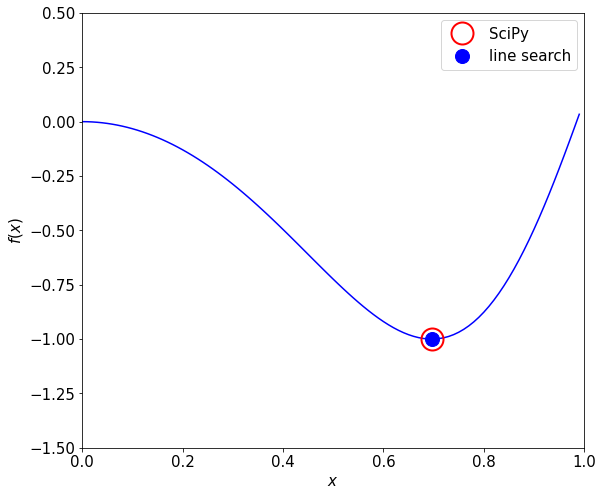

In [7]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(x, w, 'b-')
ax.plot(scipy_min_x, scipy_min_value, 'ro', markeredgewidth=2, markersize=22, label='SciPy')
ax.plot(min_x, min_value, 'bo', fillstyle='full', label='line search')

ax.set(xlabel='$x$', ylabel='$f(x)$', xlim=[0, 1], ylim=[-1.5, 0.5])
plt.legend();

## TO DO
### Repeat the process for `myfunction2`
Try using different initialisations in order to find the *global* minimum

In [27]:
x2 = arange(0, 1, step=0.01)
w2 = array([my_function2(x2_i) for x2_i in x2])

In [40]:
min_x2, min_value2 = line_search(my_function2, start=0, end=0.5, tolerance=1e-4) #0.5 to find global min and "skip over" local min

Current Search Region is 0.000000 to 0.500000
Current Search Region is 0.000000 to 0.333333
Current Search Region is 0.111111 to 0.333333
Current Search Region is 0.111111 to 0.259259
Current Search Region is 0.160494 to 0.259259
Current Search Region is 0.160494 to 0.226337
Current Search Region is 0.182442 to 0.226337
Current Search Region is 0.182442 to 0.211706
Current Search Region is 0.192196 to 0.211706
Current Search Region is 0.192196 to 0.205202
Current Search Region is 0.196532 to 0.205202
Current Search Region is 0.196532 to 0.202312
Current Search Region is 0.198459 to 0.202312
Current Search Region is 0.199743 to 0.202312
Current Search Region is 0.199743 to 0.201456
Current Search Region is 0.200314 to 0.201456
Current Search Region is 0.200314 to 0.201075
Current Search Region is 0.200568 to 0.201075
Current Search Region is 0.200568 to 0.200906
Current Search Region is 0.200681 to 0.200906
Current Search Region is 0.200756 to 0.200906
Current Search Region is 0.200756 

In [43]:
scipy_min_x2 = fmin(my_function2, x0=0, xtol=1e-4)
scipy_min_value2 = my_function2(scipy_min_x2)

Optimization terminated successfully.
         Current function value: -1.129756
         Iterations: 20
         Function evaluations: 40


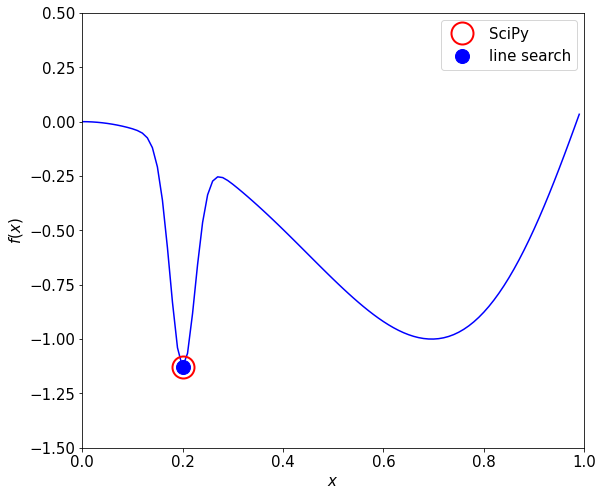

In [44]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(x2, w2, 'b-')
ax.plot(scipy_min_x2, scipy_min_value2, 'ro', markeredgewidth=2, markersize=22, label='SciPy')
ax.plot(min_x2, min_value2, 'bo', fillstyle='full', label='line search')

ax.set(xlabel='$x$', ylabel='$f(x)$', xlim=[0, 1], ylim=[-1.5, 0.5])
plt.legend();